## Trần Nhật Trường_UEH_F31.2
Calculating the Correlations Between Stocks (Vietnam Ho Chi Minh Stock Index) using Python

## Set-up Input data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import Input_Inv as Input

%load_ext autoreload
%autoreload 2

In [2]:
tickers = ['MBB.csv','VCB.csv','MWG.csv','PHR.csv','DHG.csv','LGC.csv','VNIndex.csv','VN30.csv']
port = pd.DataFrame()
for t in tickers:
    port[t] = Input.read_data(t)['Close']

In [3]:
port

,MBB.csv,VCB.csv,MWG.csv,PHR.csv,DHG.csv,LGC.csv,VNIndex.csv,VN30.csv
Date,,,,,,,,
2017-01-03,13095.0,27643,37061,14304.0,65933.0,23000.0,672.01,633.89
2017-01-04,12952.0,27457,37203,14385.0,68200.0,24600.0,674.70,632.70
2017-01-05,12857.0,27569,37321,14547.0,68200.0,25100.0,675.81,634.83
2017-01-06,13095.0,28125,37321,14197.0,67333.0,25100.0,679.80,636.34
2017-01-09,13048.0,28719,37061,14008.0,67667.0,25600.0,682.57,638.40
...,...,...,...,...,...,...,...,...
2021-12-27,28150.0,79800,134900,72000.0,115600.0,NaN,1488.88,1514.55
2021-12-28,28300.0,80000,135800,71700.0,115900.0,48750.0,1494.39,1523.54
2021-12-29,28300.0,79500,134400,70800.0,113400.0,46250.0,1485.82,1515.94


## Chuẩn hóa Variables

In [4]:
port.columns = ['MBB','VCB','MWG','PHR','DHG','LGC','VNIndex','VN30']
port

,MBB,VCB,MWG,PHR,DHG,LGC,VNIndex,VN30
Date,,,,,,,,
2017-01-03,13095.0,27643,37061,14304.0,65933.0,23000.0,672.01,633.89
2017-01-04,12952.0,27457,37203,14385.0,68200.0,24600.0,674.70,632.70
2017-01-05,12857.0,27569,37321,14547.0,68200.0,25100.0,675.81,634.83
2017-01-06,13095.0,28125,37321,14197.0,67333.0,25100.0,679.80,636.34
2017-01-09,13048.0,28719,37061,14008.0,67667.0,25600.0,682.57,638.40
...,...,...,...,...,...,...,...,...
2021-12-27,28150.0,79800,134900,72000.0,115600.0,NaN,1488.88,1514.55
2021-12-28,28300.0,80000,135800,71700.0,115900.0,48750.0,1494.39,1523.54
2021-12-29,28300.0,79500,134400,70800.0,113400.0,46250.0,1485.82,1515.94


In [5]:
port_return = np.log(port/port.shift(1))
port_return.dropna(inplace=True)
port_return

,MBB,VCB,MWG,PHR,DHG,LGC,VNIndex,VN30
Date,,,,,,,,
2017-01-04,-0.010980,-0.006751,0.003824,0.005647,0.033805,0.067252,0.003995,-0.001879
2017-01-05,-0.007362,0.004071,0.003167,0.011199,0.000000,0.020121,0.001644,0.003361
2017-01-06,0.018342,0.019967,0.000000,-0.024354,-0.012794,0.000000,0.005887,0.002376
2017-01-09,-0.003596,0.020900,-0.006991,-0.013402,0.004948,0.019725,0.004066,0.003232
2017-01-12,0.007228,-0.014402,0.000000,0.000000,-0.001898,0.044997,-0.000291,-0.001773
...,...,...,...,...,...,...,...,...
2021-12-10,-0.007030,0.008028,0.000746,0.055769,-0.015146,0.045937,-0.003029,-0.006658
2021-12-13,0.001762,-0.004012,0.005948,0.016552,0.067546,0.006104,0.008620,0.000882
2021-12-24,0.030661,0.025808,0.007457,-0.018843,-0.043089,0.046884,0.013681,0.019638


In [6]:
port_Cov = port_return.cov()
port_Cov

,MBB,VCB,MWG,PHR,DHG,LGC,VNIndex,VN30
MBB,0.000569,0.000222,0.000176,0.000202,0.000092,0.000010,0.000164,0.000183
VCB,0.000222,0.000319,0.000121,0.000113,0.000088,0.000009,0.000145,0.000150
MWG,0.000176,0.000121,0.000347,0.000153,0.000085,0.000037,0.000114,0.000133
PHR,0.000202,0.000113,0.000153,0.000522,0.000052,0.000039,0.000112,0.000116
DHG,0.000092,0.000088,0.000085,0.000052,0.000310,0.000002,0.000065,0.000069
LGC,0.000010,0.000009,0.000037,0.000039,0.000002,0.001954,0.000026,0.000014
VNIndex,0.000164,0.000145,0.000114,0.000112,0.000065,0.000026,0.000116,0.000120
VN30,0.000183,0.000150,0.000133,0.000116,0.000069,0.000014,0.000120,0.000134


In [7]:
port_Corr = port_return.corr()
port_Corr

,MBB,VCB,MWG,PHR,DHG,LGC,VNIndex,VN30
MBB,1.000000,0.520861,0.397077,0.371463,0.220124,0.009434,0.636550,0.662829
VCB,0.520861,1.000000,0.364466,0.277849,0.280386,0.011524,0.755533,0.726023
MWG,0.397077,0.364466,1.000000,0.360424,0.260430,0.045037,0.569808,0.617762
PHR,0.371463,0.277849,0.360424,1.000000,0.128160,0.039074,0.456219,0.439447
DHG,0.220124,0.280386,0.260430,0.128160,1.000000,0.002142,0.343283,0.340249
LGC,0.009434,0.011524,0.045037,0.039074,0.002142,1.000000,0.055257,0.028289
VNIndex,0.636550,0.755533,0.569808,0.456219,0.343283,0.055257,1.000000,0.963639
VN30,0.662829,0.726023,0.617762,0.439447,0.340249,0.028289,0.963639,1.000000


In [8]:
ones_Corr = np.ones_like(port_Corr,dtype=bool)
ones_Corr

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [9]:
mask = np.triu(ones_Corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

In [10]:
adjust_mask = mask[1:, :-1]
adjust_mask

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

In [11]:
adjust_port_Corr = port_Corr.iloc[1:, :-1]

Text(0.5, 1.0, 'Tương quan giữa từng loại tài sản trong danh mục\n')

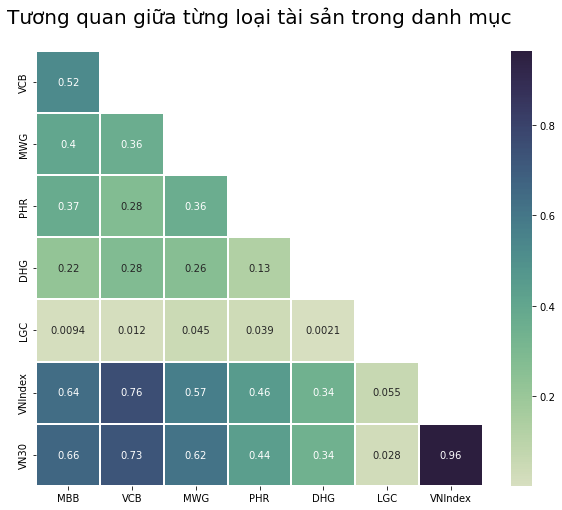

In [135]:
fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

sns.heatmap(data=adjust_port_Corr, mask=adjust_mask, annot=True, cmap=cmap,linecolor='White',linewidths=0.1)

title = 'Tương quan giữa từng loại tài sản trong danh mục\n'
ax.set_title(title, loc='center',fontsize=20)

In [13]:
Cov_MBB_VNIndex = port_Cov.iloc[0,6]
Cov_VCB_VNIndex = port_Cov.iloc[1,6]
Cov_MWG_VNIndex = port_Cov.iloc[2,6]
Cov_PHR_VNIndex = port_Cov.iloc[3,6]
Cov_DHG_VNIndex = port_Cov.iloc[4,6]
Cov_LGC_VNIndex = port_Cov.iloc[5,6]
Cov_VN30_VNIndex = port_Cov.iloc[7,6]

In [14]:
Cov_MBB_VNIndex

0.0001635365626718792

In [15]:
Cov_VCB_VNIndex

0.00014536324545970323

In [16]:
Cov_MWG_VNIndex

0.00011434348098208295

In [17]:
Cov_PHR_VNIndex

0.00011232252019546194

In [18]:
Cov_DHG_VNIndex

6.516668245554595e-05

In [19]:
Cov_LGC_VNIndex

2.6318106986963764e-05

In [20]:
Cov_VN30_VNIndex

0.00012034247312792472

In [21]:
VNIndex_Var = port_return['VNIndex'].var()

In [22]:
VNIndex_Var

0.00011609147382932464

In [23]:
VN30_Var = port_return['VN30'].var()
VN30_Var

0.00013434111881158268

## Tính Beta

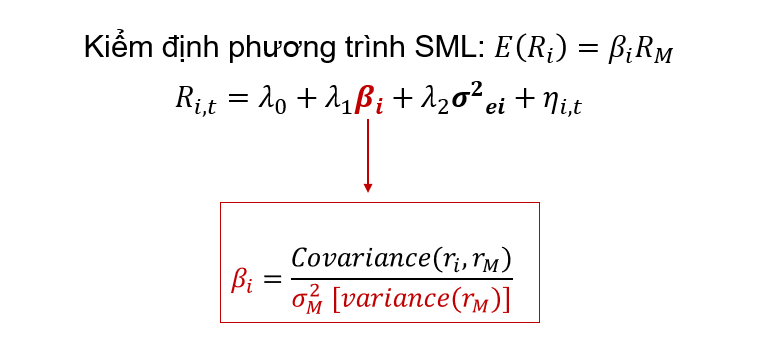

In [24]:
LGC_Beta = Cov_LGC_VNIndex/VNIndex_Var

In [25]:
LGC_Beta

0.22670146324144458

In [26]:
LGC_Beta = Cov_LGC_VNIndex/VN30_Var
LGC_Beta

0.19590507522775416

In [27]:
VN30_Beta = Cov_VN30_VNIndex/VNIndex_Var

In [28]:
VN30_Beta

1.0366176701731757

In [29]:
VCB_Beta = Cov_VCB_VNIndex/VNIndex_Var

In [30]:
VCB_Beta

1.252144026299583

In [31]:
port_Cov.loc['VCB','VNIndex']/VNIndex_Var

1.252144026299583

In [32]:
VCB_Beta = Cov_VCB_VNIndex/VN30_Var
VCB_Beta

1.0820458155003116

In [33]:
MWG_Beta = Cov_MWG_VNIndex/VNIndex_Var
MWG_Beta

0.9849429696291775

In [34]:
port_Cov.loc['VNIndex']/VNIndex_Var

MBB        1.408687
VCB        1.252144
MWG        0.984943
PHR        0.967535
DHG        0.561339
LGC        0.226701
VNIndex    1.000000
VN30       1.036618
Name: VNIndex, dtype: float64

In [35]:
port_Cov.loc['VN30']/VN30_Var

MBB        1.363574
VCB        1.118528
MWG        0.992658
PHR        0.866354
DHG        0.517208
LGC        0.107892
VNIndex    0.895798
VN30       1.000000
Name: VN30, dtype: float64

In [36]:
y = port_return['MWG']
x = port_return['VNIndex']

In [37]:
y

Date
2017-01-04    0.003824
2017-01-05    0.003167
2017-01-06    0.000000
2017-01-09   -0.006991
2017-01-12    0.000000
                ...   
2021-12-10    0.000746
2021-12-13    0.005948
2021-12-24    0.007457
2021-12-29   -0.010363
2021-12-30   -0.000744
Name: MWG, Length: 538, dtype: float64

In [38]:
x

Date
2017-01-04    0.003995
2017-01-05    0.001644
2017-01-06    0.005887
2017-01-09    0.004066
2017-01-12   -0.000291
                ...   
2021-12-10   -0.003029
2021-12-13    0.008620
2021-12-24    0.013681
2021-12-29   -0.005751
2021-12-30    0.000101
Name: VNIndex, Length: 538, dtype: float64

Text(0.5, 1.0, 'Thị giá MWG và chỉ số VNIndex')

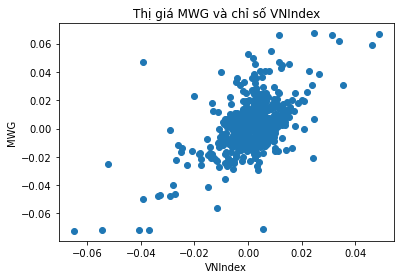

In [39]:
plt.scatter(x,y)
plt.ylabel('MWG')
plt.xlabel('VNIndex')
plt.title("Thị giá MWG và chỉ số VNIndex")

In [40]:
x1 = sm.add_constant(x)
x1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,VNIndex
Date,,
2017-01-04,1.0,0.003995
2017-01-05,1.0,0.001644
2017-01-06,1.0,0.005887
2017-01-09,1.0,0.004066
2017-01-12,1.0,-0.000291
...,...,...
2021-12-10,1.0,-0.003029
2021-12-13,1.0,0.008620
2021-12-24,1.0,0.013681


## Regression_Beta

In [41]:
results_reg_MWG = sm.OLS(y,x1).fit()

In [42]:
results_reg_MWG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MWG   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.23e-47
Time:                        17:08:33   Log-Likelihood:                 1485.7
No. Observations:                 538   AIC:                            -2967.
Df Residuals:                     536   BIC:                            -2959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.513      0.131      -0.000       0.002
VNIndex        0.9849      0.061     16.053      0.000       0.864       1.105
==============================================================================
Omnibus:                       74.698   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.725
Skew:                           0.578   Prob(JB):                     2.45e-62
Kurtosis:                       6.365   Cond. No.                         92.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regplot đối với Variables

In [51]:
y_VCB = port_return['VCB']
y_MBB = port_return['MBB']
y_MWG = port_return['MWG']
y_PHR = port_return['PHR']
y_DHG = port_return['DHG']
y_LGC = port_return['LGC']
x_VNIndex = port_return['VNIndex']

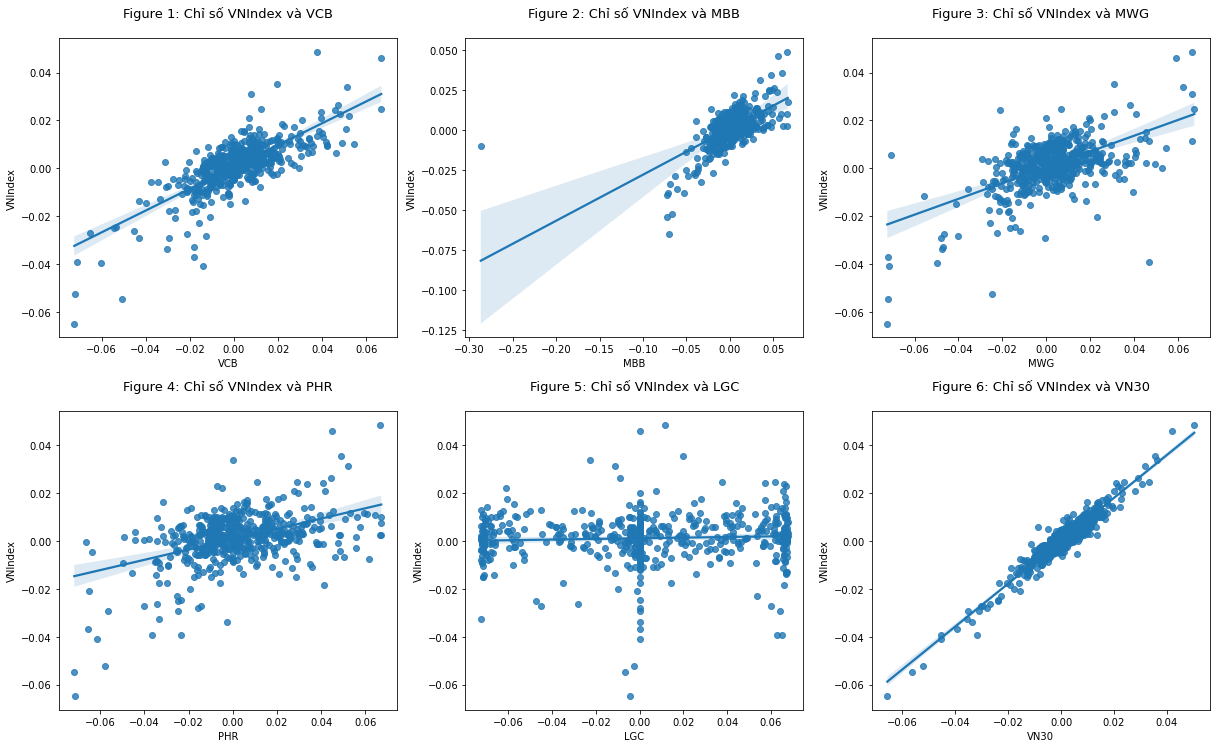

In [133]:
label = ['VCB','MBB','MWG','PHR','LGC','VN30']
y = 2
x = 3

fig, ax = plt.subplots(y, x, figsize =(y*8.5, x*3.5))

for r in range(0, y):
    for c in range(0, x):
        i = r*x + c
        if i < len(label):
            ax_i = ax[r,c]
            sns.regplot(data=port_return, x=label[i], y=x_VNIndex, ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Chỉ số VNIndex và {label[i]}\n", fontsize=13)
plt.tight_layout()